# 1. Importing data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('insurance.csv')

In [4]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 2. Exploratory Data Analysis (EDA)

# 2.1 Data Summary

In [5]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [8]:
data.shape

(1338, 7)

In [ ]:
data.dtypes

In [9]:
# #Converting object to category
# data['sex'] = data['sex'].astype('category')
# data['smoker'] = data['smoker'].astype('category')
# data['region'] = data['region'].astype('category')

In [10]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Check Missing value

In [11]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Check Duplicated Data

In [13]:
data.duplicated().sum()

1

In [14]:
# Check Duplicated Data (the last data except the first one)

data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [15]:
# Find all duplicated data
data[data['charges']==1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [16]:
# Remove the duplicated data 
data.drop_duplicates(keep='last')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [17]:
#Remove Duplicated
data.drop(581, inplace=True)

In [18]:
data.shape

(1337, 7)

In [19]:
data.duplicated().sum()

0

Text(0.5, 1.0, 'Distribution of the column - charges')

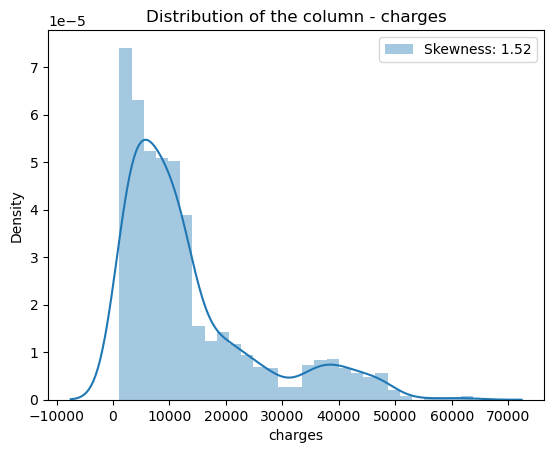

In [20]:
### Understanding the distribution of the column - charge

sns.distplot(data['charges'], label = 'Skewness: %.2f'%(data['charges'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - charges')

In [ ]:
### Use histrogram 

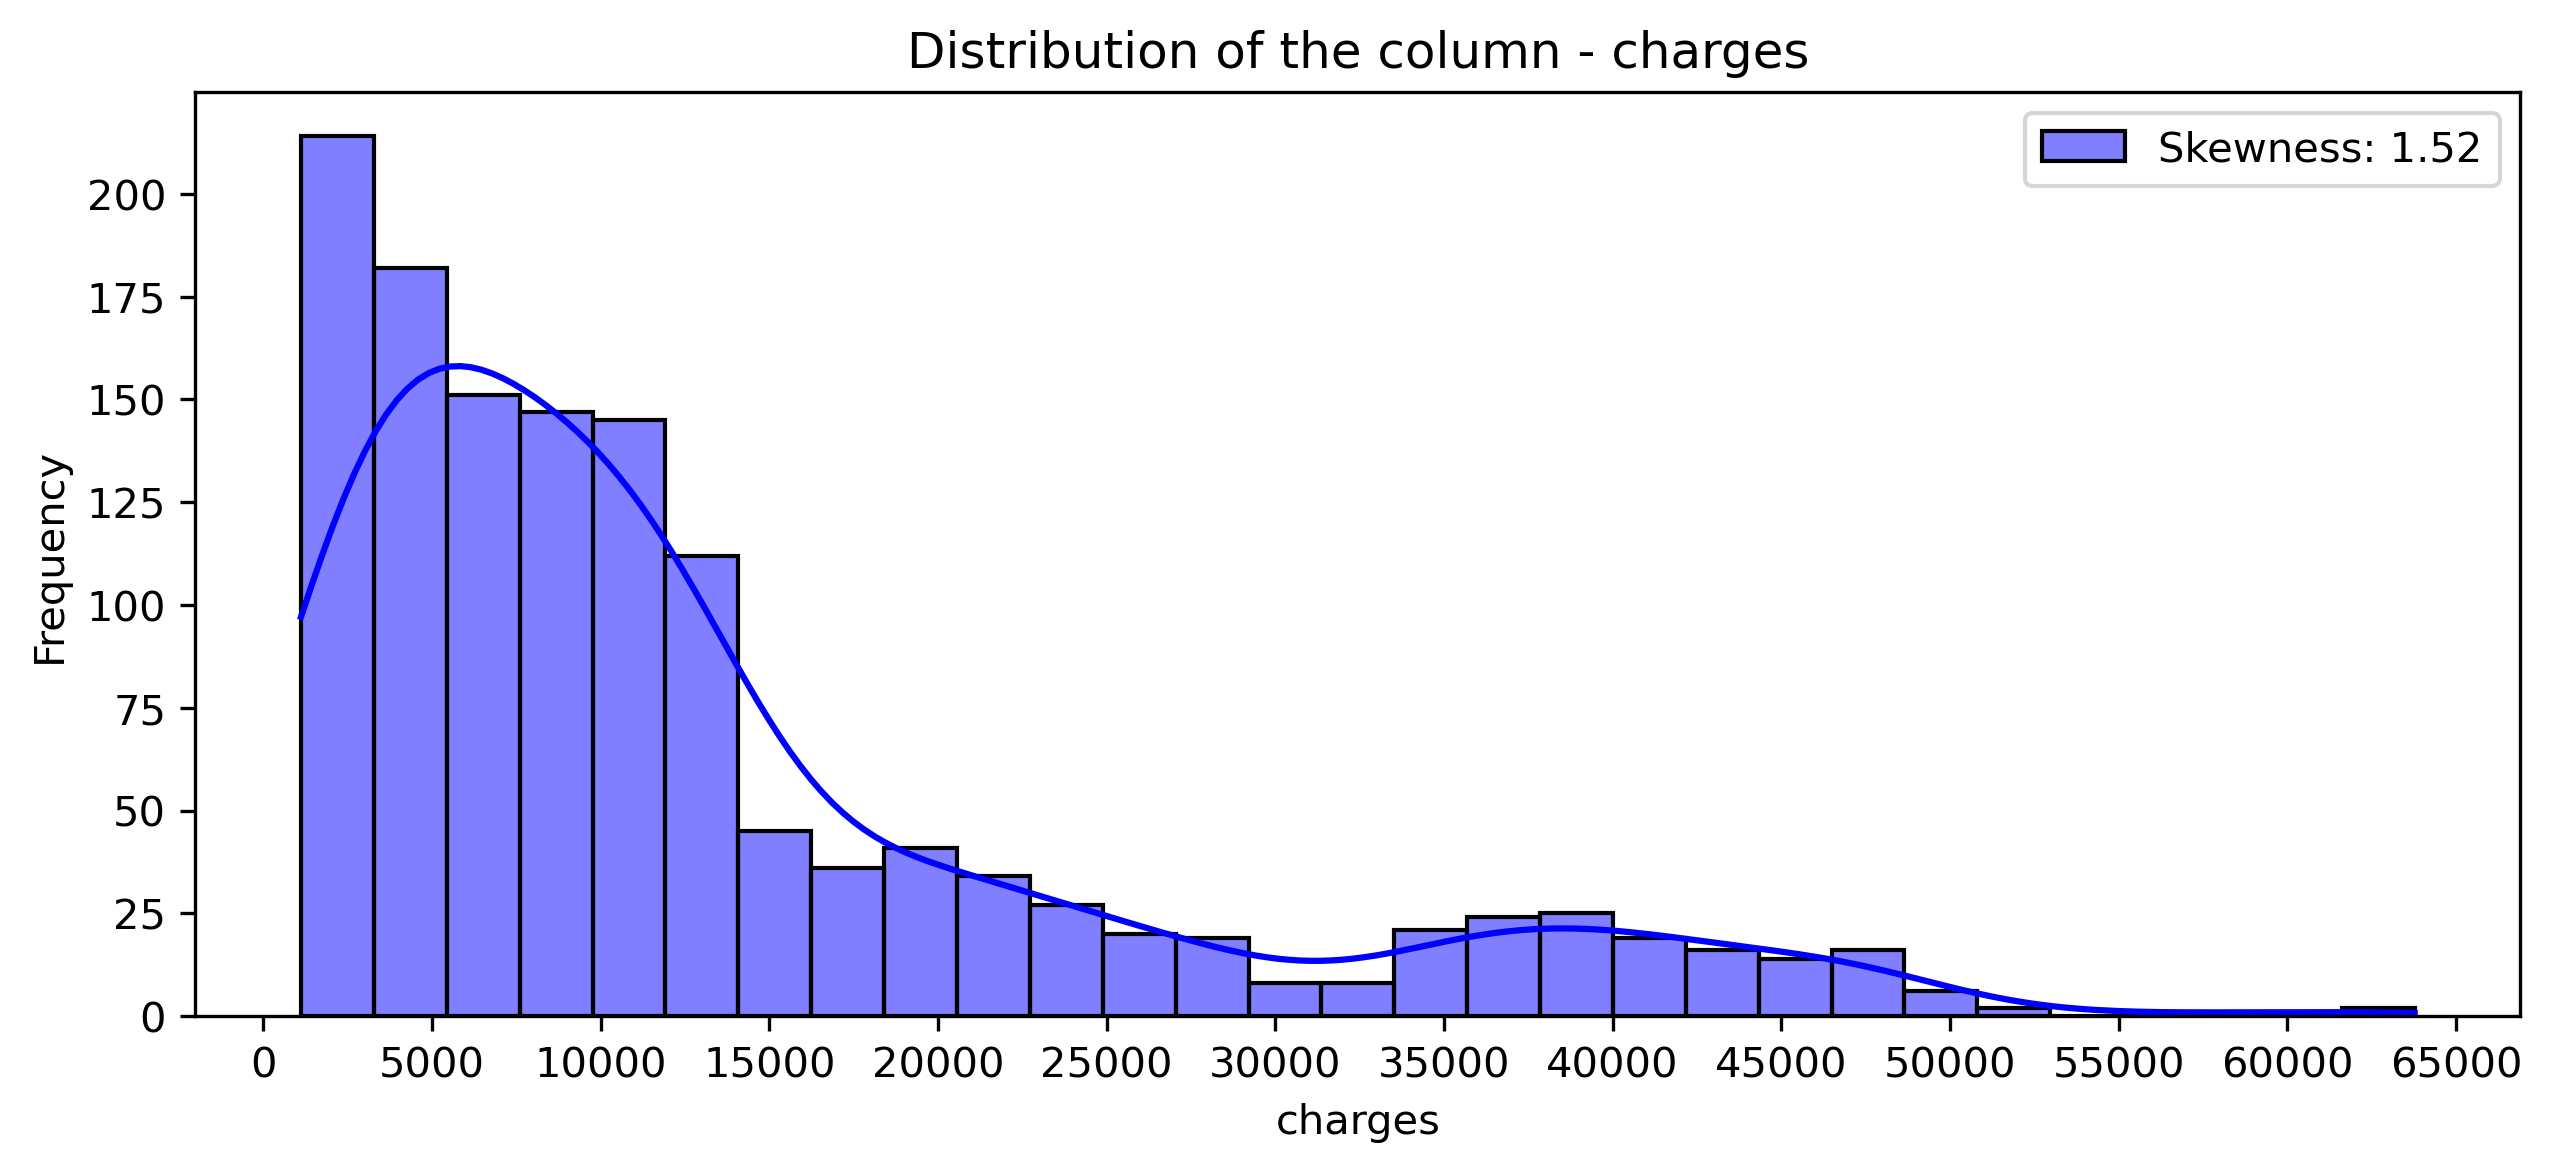

In [33]:
fig ,ax = plt.subplots(figsize = (10, 4), dpi = 300)
sns.histplot(data['charges'], 
             kde = True ,
             label = 'Skewness: %.2f'%(data['charges'].skew()),
             color = 'b')
ax.set_xticks(np.arange(0, 70000, 5000))
plt.legend()
plt.title('Distribution of the column - charges')
plt.ylabel('Frequency')
plt.savefig('Distribution of Charges')
plt.show()

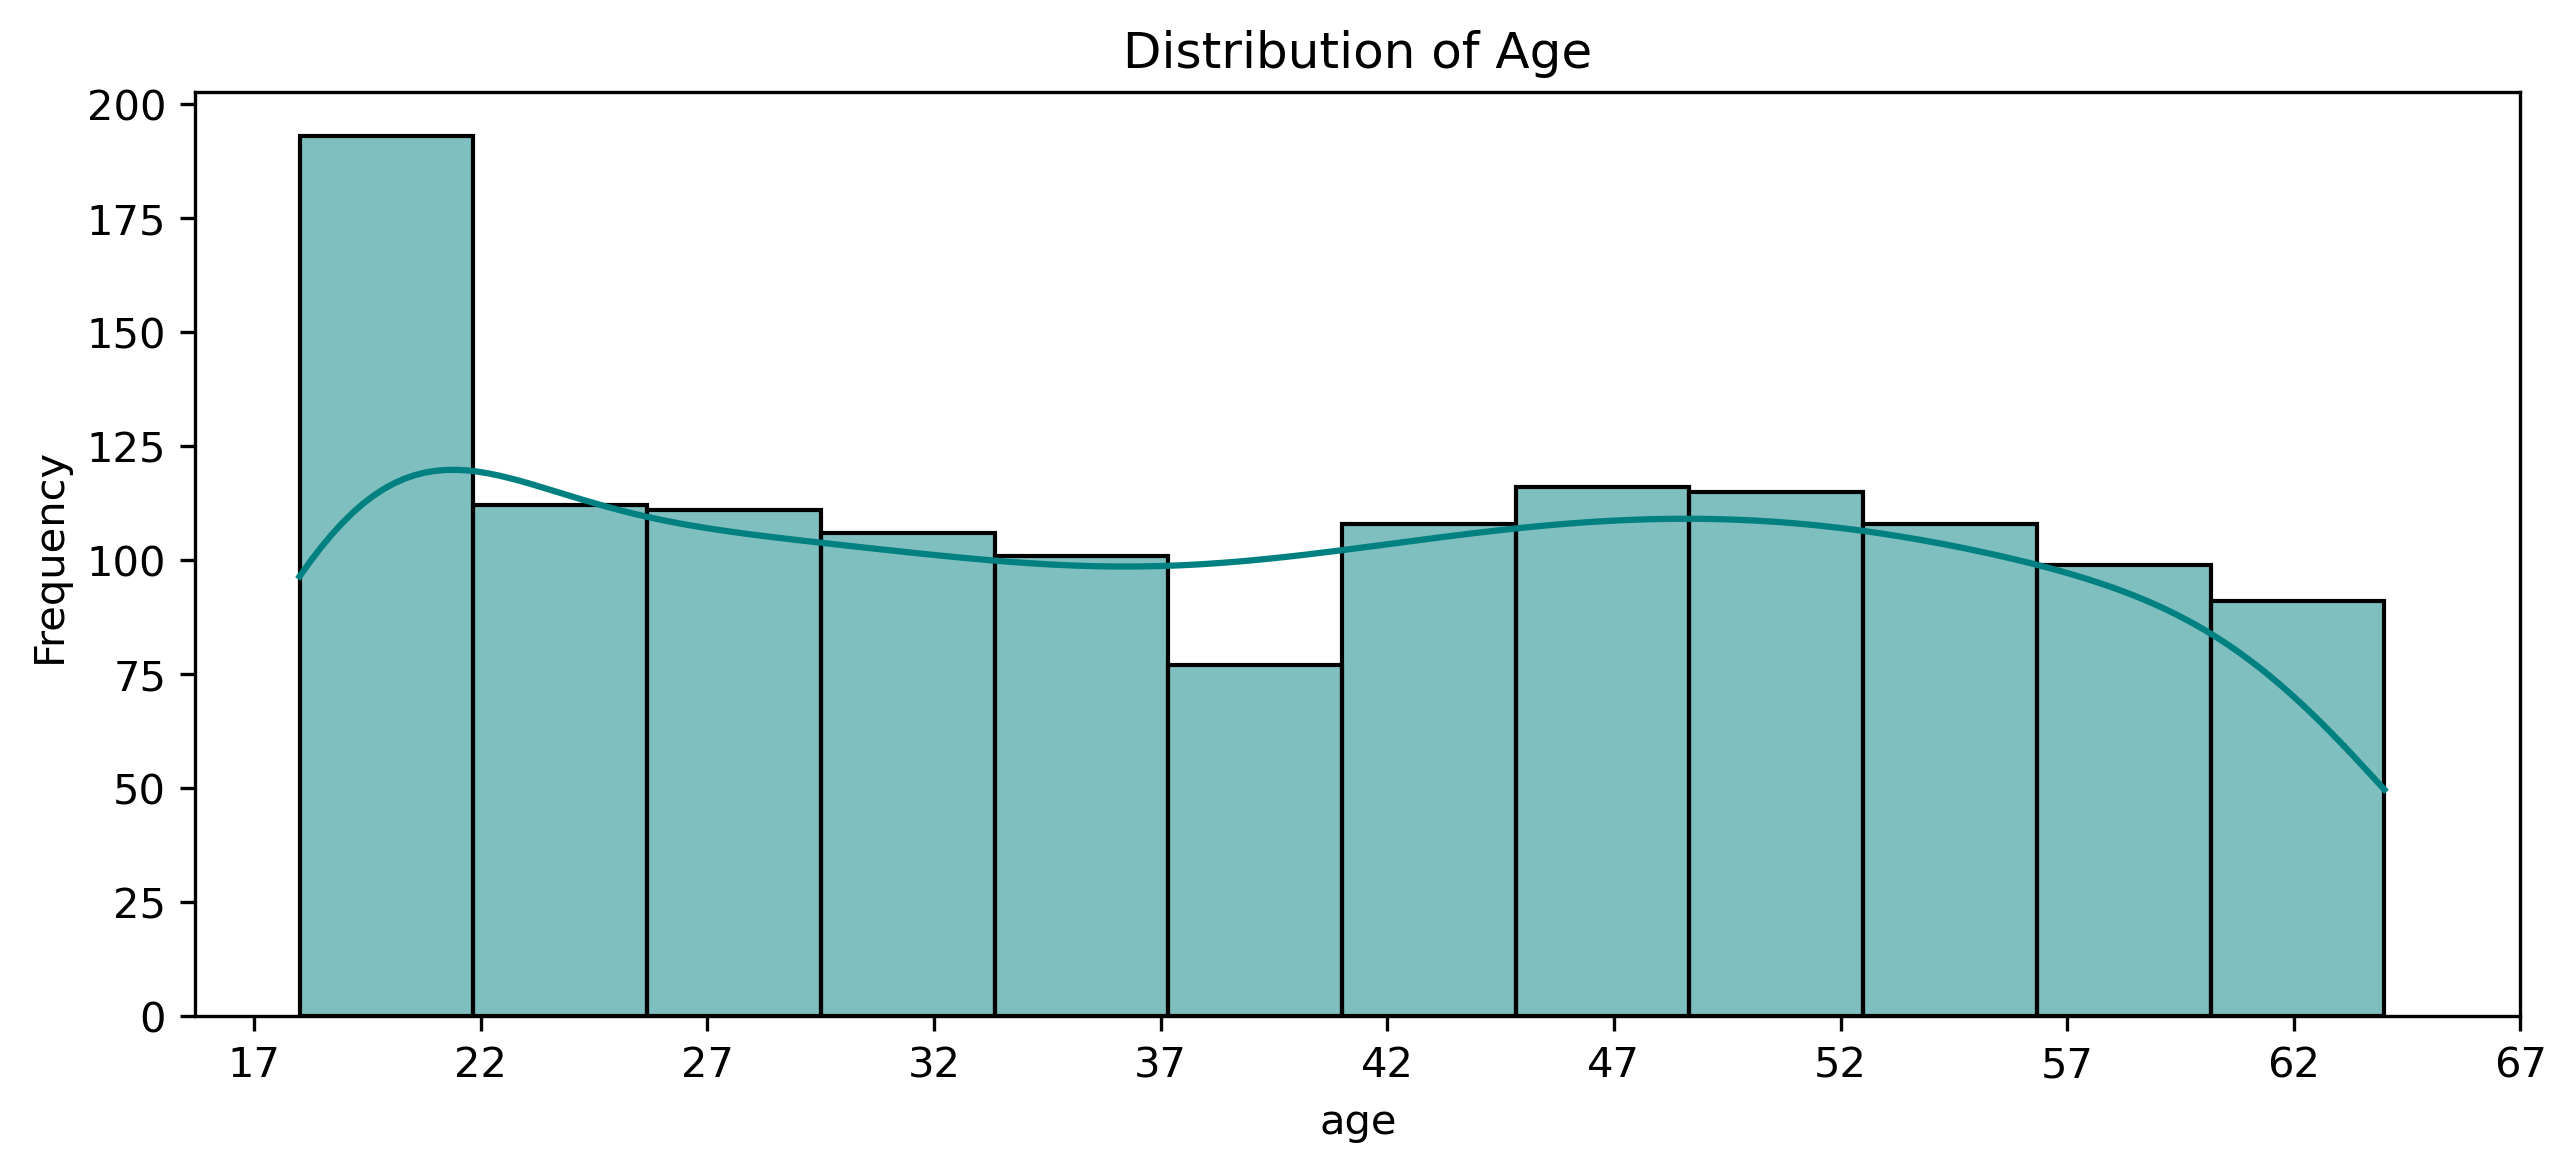

In [44]:
fig ,ax = plt.subplots(figsize = (10, 4), dpi = 300)
sns.histplot(data['age'],kde = True,color = 'teal')
ax.set_title('Distribution of Age')
ax.set_ylabel('Frequency')
ax.set_xticks(np.arange(17, 70, 5))
plt.show()

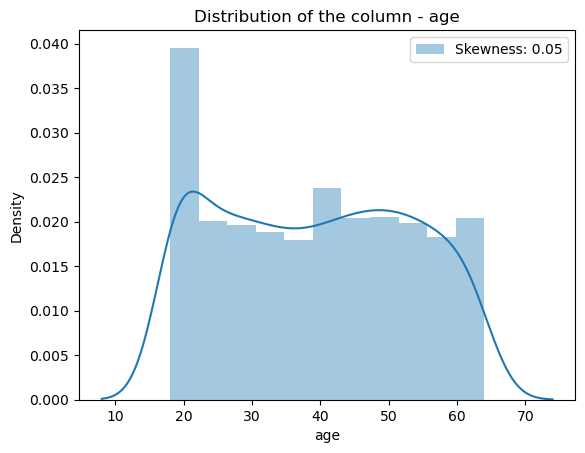

In [25]:
### Understanding the distribution of the column - age

sns.distplot(data['age'], label = 'Skewness: %.2f'%(data['age'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - age')
plt.show()

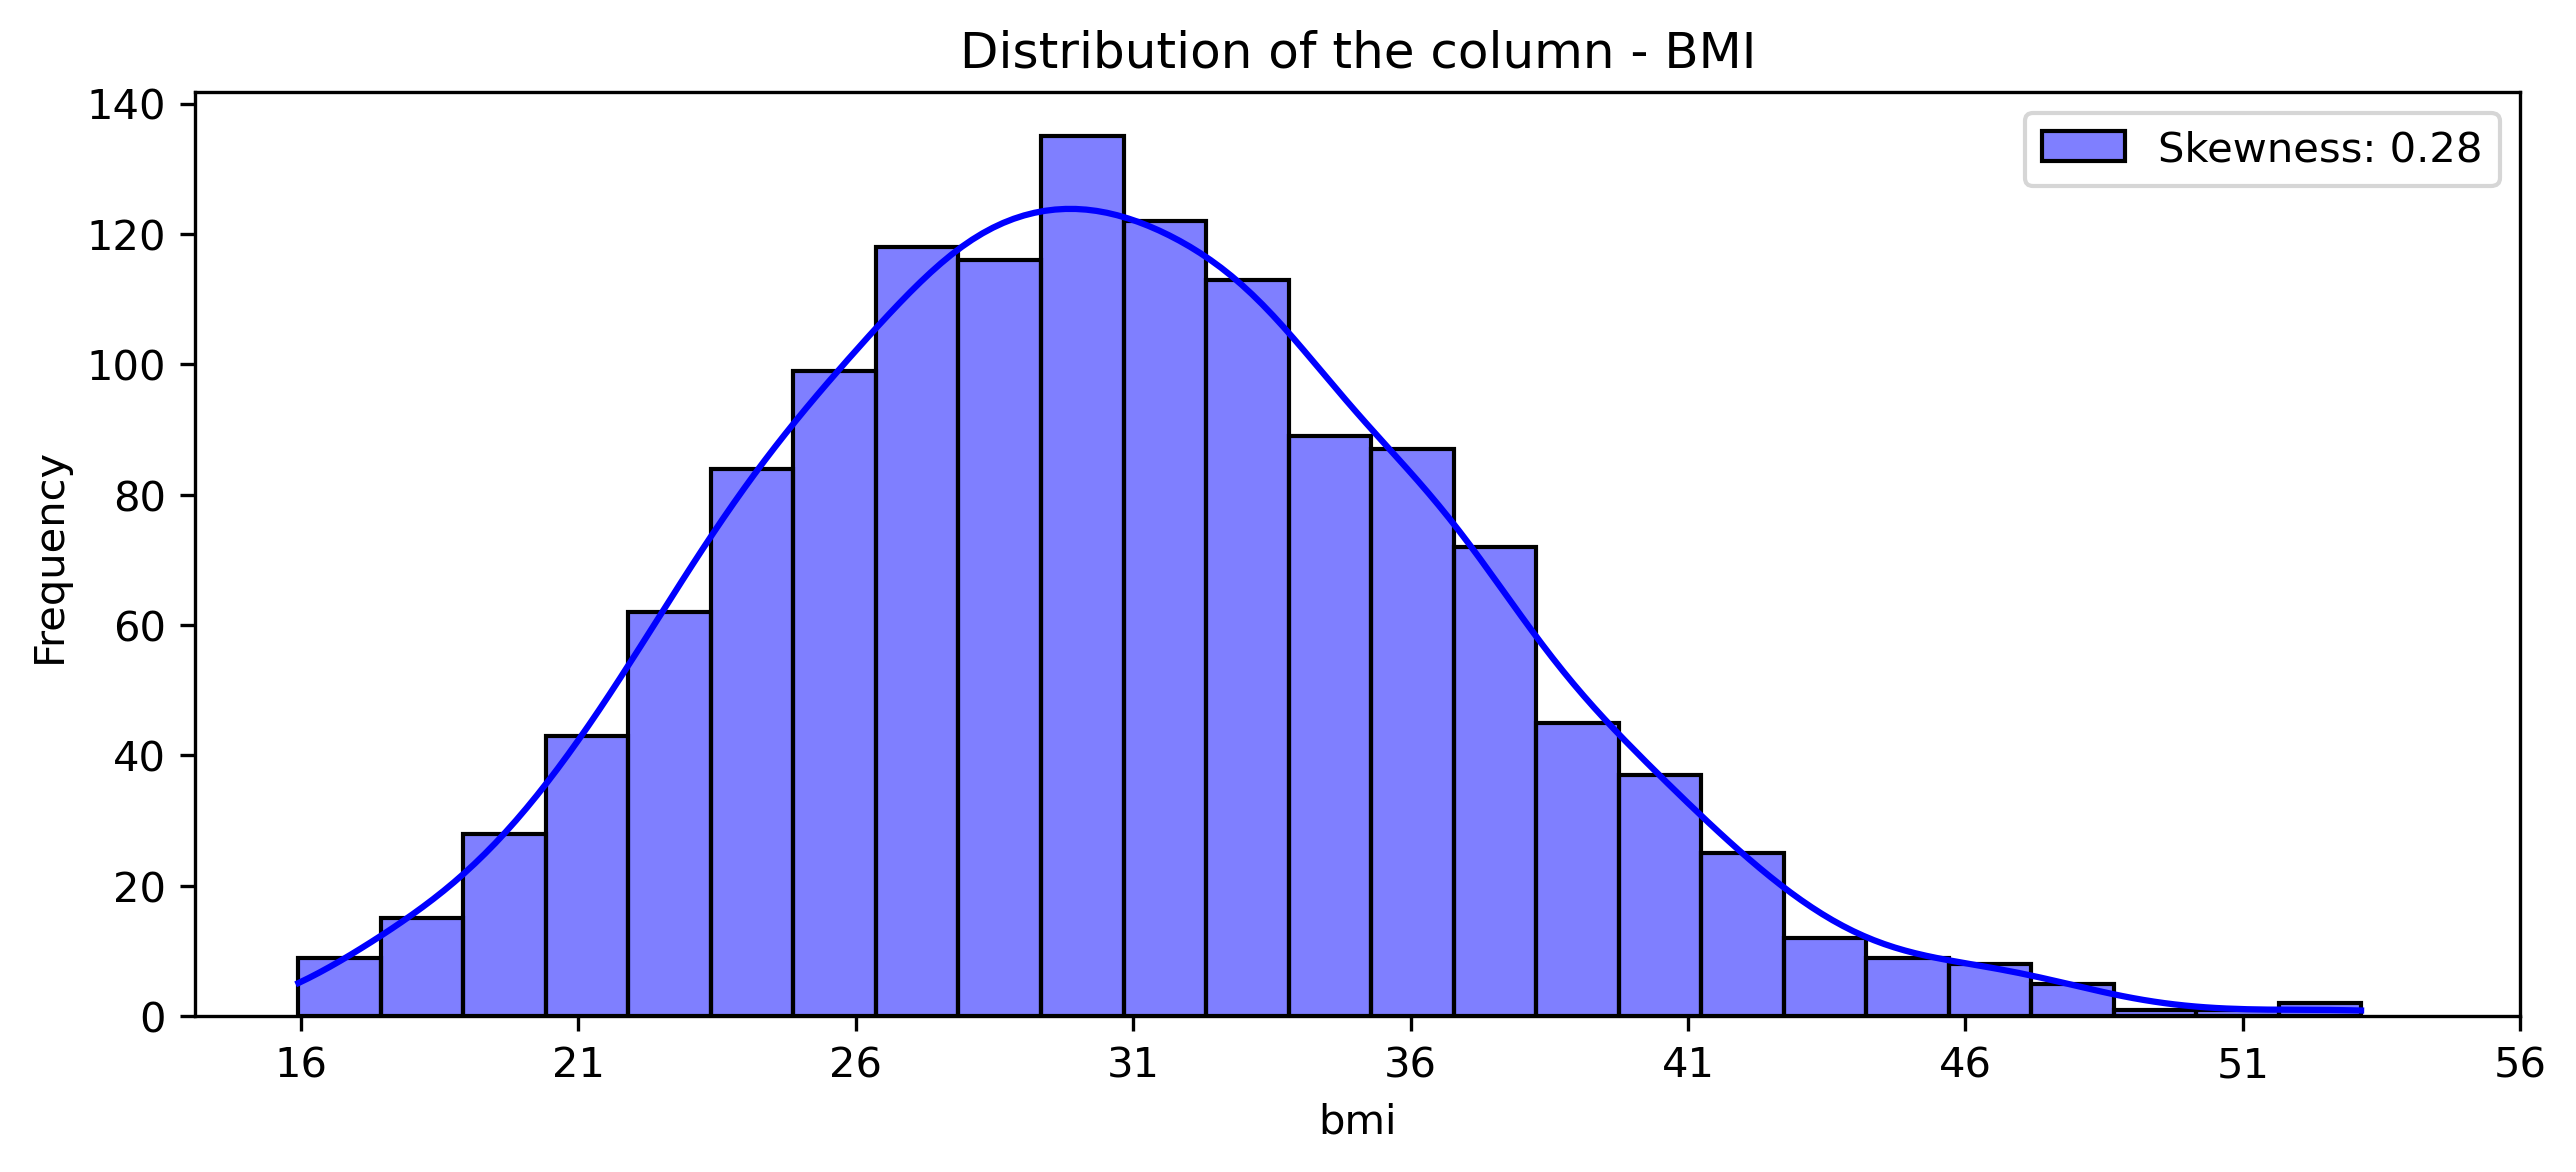

In [53]:
fig ,ax = plt.subplots(figsize = (10, 4), dpi = 300)
sns.histplot(data['bmi'], 
             kde = True ,
             label = 'Skewness: %.2f'%(data['bmi'].skew()),
             color = 'b')
ax.set_xticks(np.arange(16, 60, 5))
plt.legend()
plt.title('Distribution of the column - BMI')
plt.ylabel('Frequency')
# plt.savefig('Distribution of ')
plt.show()

In [54]:
data['bmi'].describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [59]:
### Understanding the distribution of the column - bmi

# sns.distplot(data['bmi'], label = 'Skewness: %.2f'%(data['bmi'].skew()))
# plt.legend(loc = 'best')
# plt.title('Distribution of the column - bmi')

In [60]:
#Calculate Skewness
skewness_charges= data['charges'].skew()
skewness_charges

1.5153909108403483

In [61]:
skewness_age= data['age'].skew()
skewness_age

0.054780773126998195

In [62]:
skewness_bmi= data['bmi'].skew()
skewness_bmi

0.28391419385321137

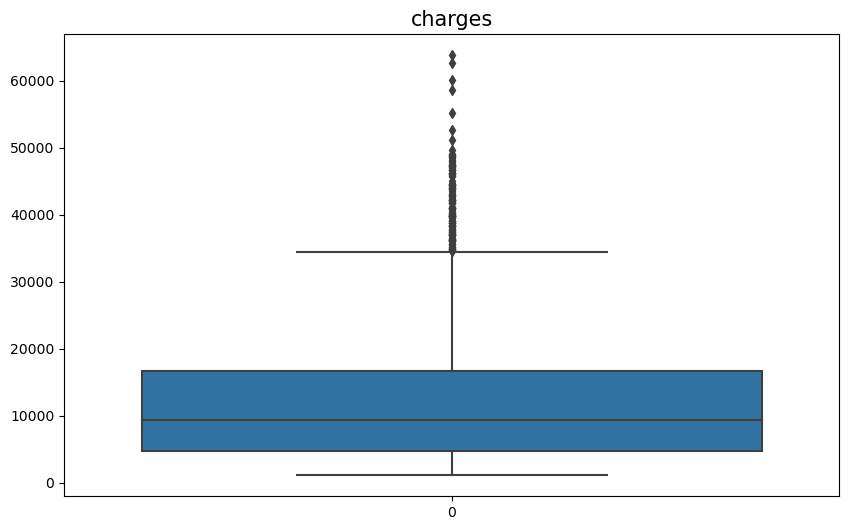

In [63]:
#Check outlier before capping
plt.figure(figsize=(10,6))
sns.boxplot(data['charges'])
plt.title('charges', size=15)
plt.show()

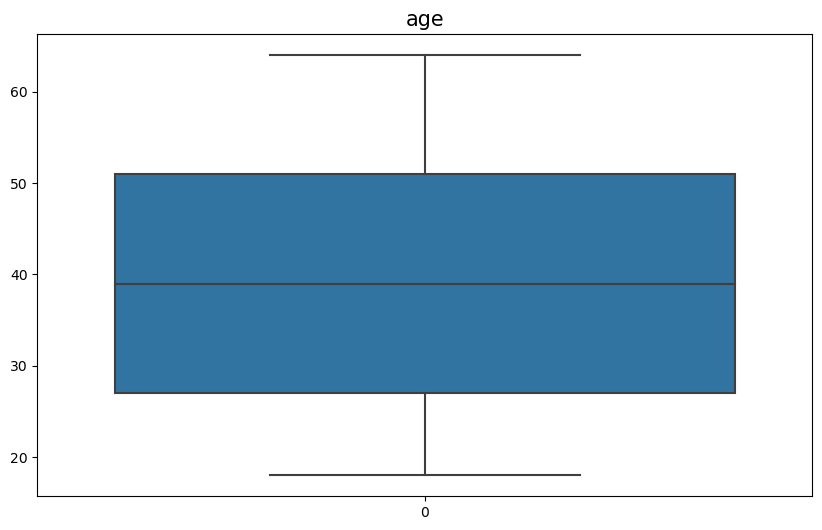

In [64]:
#Check outlier before capping
plt.figure(figsize=(10,6))
sns.boxplot(data['age'])
plt.title('age', size=15)
plt.show()

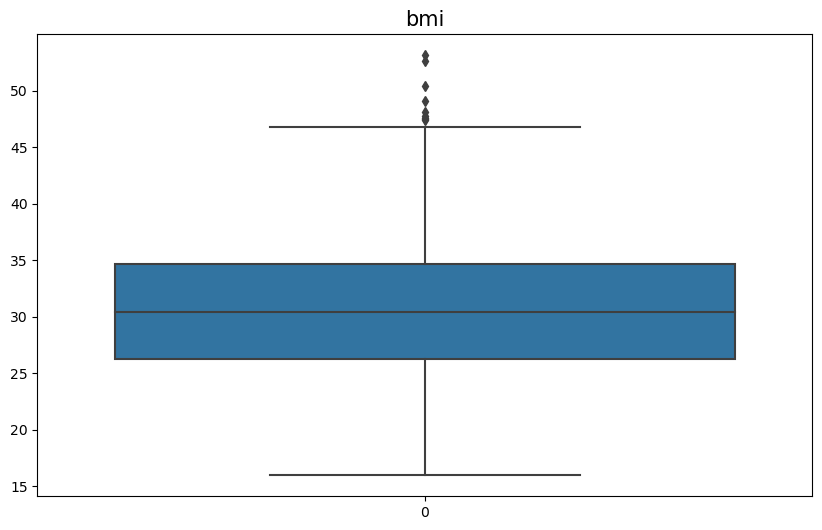

In [65]:
#Check outlier before capping
plt.figure(figsize=(10,6))
sns.boxplot(data['bmi'])
plt.title('bmi', size=15)
plt.show()

In [66]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [67]:
lowerprice, upperprice = remove_outlier(data["charges"])
data["charges"] = np.where(data["charges"]>upperprice, upperprice, data["charges"])
data["charges"] = np.where(data["charges"]<lowerprice, lowerprice, data["charges"])

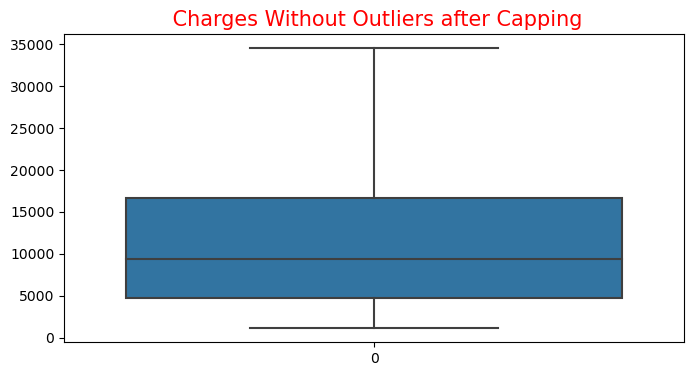

In [68]:
plt.figure(figsize=(8,4))
sns.boxplot(data["charges"])
plt.title(" Charges Without Outliers after Capping", size=15,color="r")
plt.show()

In [69]:
lowerprice, upperprice = remove_outlier(data["bmi"])
data["bmi"] = np.where(data["bmi"]>upperprice, upperprice, data["bmi"])
data["bmi"] = np.where(data["bmi"]<lowerprice, lowerprice, data["bmi"])

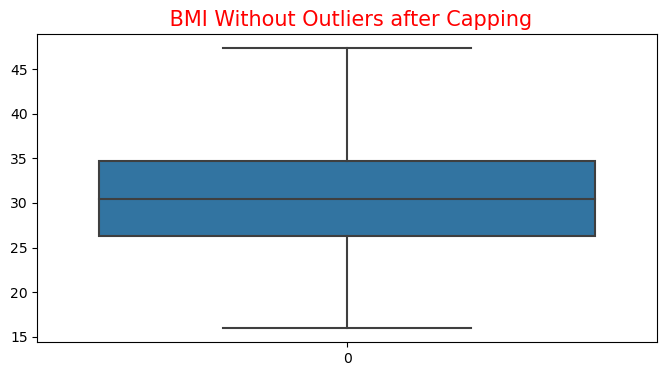

In [70]:
plt.figure(figsize=(8,4))
sns.boxplot(data["bmi"])
plt.title(" BMI Without Outliers after Capping", size=15,color="r")
plt.show()

In [71]:
lowerprice, upperprice = remove_outlier(data["age"])
data["age"] = np.where(data["age"]>upperprice, upperprice, data["age"])
data["age"] = np.where(data["age"]<lowerprice, lowerprice, data["age"])

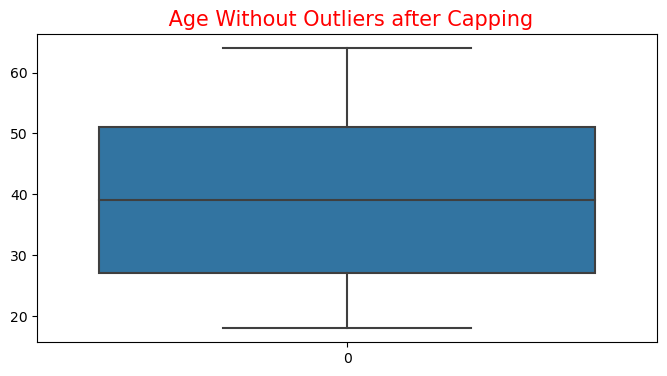

In [72]:
plt.figure(figsize=(8,4))
sns.boxplot(data["age"])
plt.title(" Age Without Outliers after Capping", size=15,color="r")
plt.show()

In [73]:
#3.2 Feature Analysis for categorical variables (sex, smoker, region)


In [74]:
#Count value in column 'sex'
sex_count = data['sex'].value_counts(dropna = False)
sex_count

sex
male      675
female    662
Name: count, dtype: int64

In [75]:
#Count value in column 'smoker'
smoker_count = data['smoker'].value_counts(dropna = False)
smoker_count

smoker
no     1063
yes     274
Name: count, dtype: int64

In [76]:
#Count value in column 'region'
region_count = data['region'].value_counts(dropna = False)
region_count

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

## Data Prepocessing

### Using replace 

In [77]:
data['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [79]:
data['sex'].replace({'male':1, 
                    'female':0}, inplace=True)

In [80]:
data['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [81]:
data['smoker'].replace({'no':0,
                      'yes':1},inplace=True)

In [83]:
# #Label Encoding for (categorical variables)
# data['sex_l'] = LabelEncoder().fit_transform(data['sex'])
# data['smoker_l'] = LabelEncoder().fit_transform(data['smoker'])
# # data['region_l'] = LabelEncoder().fit_transform(data['region'])
# data

In [82]:
data

,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0,1,southwest,16884.92400
1,18.0,1,33.770,1,0,southeast,1725.55230
2,28.0,1,33.000,3,0,southeast,4449.46200
3,33.0,1,22.705,0,0,northwest,21984.47061
4,32.0,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,northwest,10600.54830
1334,18.0,0,31.920,0,0,northeast,2205.98080
1335,18.0,0,36.850,0,0,southeast,1629.83350
1336,21.0,0,25.800,0,0,southwest,2007.94500


In [84]:
data = pd.get_dummies(data, columns=['region'])

In [85]:
data

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,0,27.900,0,1,16884.92400,False,False,False,True
1,18.0,1,33.770,1,0,1725.55230,False,False,True,False
2,28.0,1,33.000,3,0,4449.46200,False,False,True,False
3,33.0,1,22.705,0,0,21984.47061,False,True,False,False
4,32.0,1,28.880,0,0,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,10600.54830,False,True,False,False
1334,18.0,0,31.920,0,0,2205.98080,True,False,False,False
1335,18.0,0,36.850,0,0,1629.83350,False,False,True,False
1336,21.0,0,25.800,0,0,2007.94500,False,False,False,True


## Rregion

In [ ]:
#Drop columns after encoding 
# features = data.drop(['sex', 'smoker', 'region'], axis=1)

In [86]:
data

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,0,27.900,0,1,16884.92400,False,False,False,True
1,18.0,1,33.770,1,0,1725.55230,False,False,True,False
2,28.0,1,33.000,3,0,4449.46200,False,False,True,False
3,33.0,1,22.705,0,0,21984.47061,False,True,False,False
4,32.0,1,28.880,0,0,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,10600.54830,False,True,False,False
1334,18.0,0,31.920,0,0,2205.98080,True,False,False,False
1335,18.0,0,36.850,0,0,1629.83350,False,False,True,False
1336,21.0,0,25.800,0,0,2007.94500,False,False,False,True


In [87]:
features = data.copy()

In [88]:
features.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,0,27.900,0,1,16884.92400,False,False,False,True
1,18.0,1,33.770,1,0,1725.55230,False,False,True,False
2,28.0,1,33.000,3,0,4449.46200,False,False,True,False
3,33.0,1,22.705,0,0,21984.47061,False,True,False,False
4,32.0,1,28.880,0,0,3866.85520,False,True,False,False


In [89]:
features.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [90]:
features[['region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest']] = features[['region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest']].astype(int)

In [ ]:
data.describe()

In [91]:
features

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,0,27.900,0,1,16884.92400,0,0,0,1
1,18.0,1,33.770,1,0,1725.55230,0,0,1,0
2,28.0,1,33.000,3,0,4449.46200,0,0,1,0
3,33.0,1,22.705,0,0,21984.47061,0,1,0,0
4,32.0,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,10600.54830,0,1,0,0
1334,18.0,0,31.920,0,0,2205.98080,1,0,0,0
1335,18.0,0,36.850,0,0,1629.83350,0,0,1,0
1336,21.0,0,25.800,0,0,2007.94500,0,0,0,1


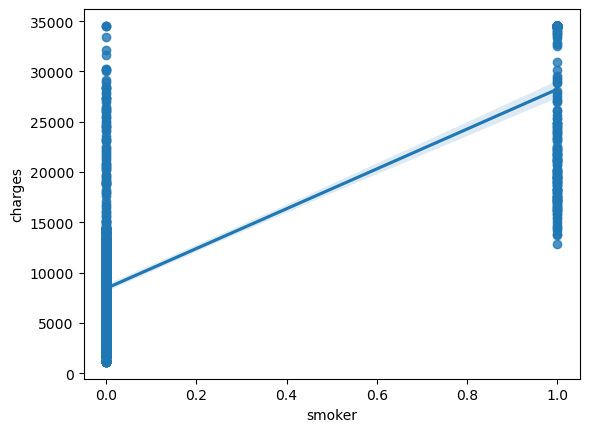

In [96]:
sns.regplot(x = features['smoker'], y= features['charges'])
plt.show()

In [97]:
cr

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.019814,0.111998,0.041536,-0.025587,0.312423,0.001868,0.001495,-0.012311,0.009415
sex,-0.019814,1.000000,0.044831,0.017848,0.076596,0.053211,-0.002008,-0.012482,0.017578,-0.003767
bmi,0.111998,0.044831,1.000000,0.013692,0.003151,0.161220,-0.138093,-0.135822,0.268600,-0.005100
children,0.041536,0.017848,0.013692,1.000000,0.007331,0.072372,-0.023202,0.026044,-0.023492,0.021538
smoker,-0.025587,0.076596,0.003151,0.007331,1.000000,0.786041,0.002597,-0.036321,0.068282,-0.037168
charges,0.312423,0.053211,0.161220,0.072372,0.786041,1.000000,0.016746,-0.033905,0.059601,-0.044707
region_northeast,0.001868,-0.002008,-0.138093,-0.023202,0.002597,0.016746,1.000000,-0.319842,-0.345909,-0.320493
region_northwest,0.001495,-0.012482,-0.135822,0.026044,-0.036321,-0.033905,-0.319842,1.000000,-0.345909,-0.320493
region_southeast,-0.012311,0.017578,0.268600,-0.023492,0.068282,0.059601,-0.345909,-0.345909,1.000000,-0.346614
region_southwest,0.009415,-0.003767,-0.005100,0.021538,-0.037168,-0.044707,-0.320493,-0.320493,-0.346614,1.000000


In [94]:
cr =features.corr()
cr['charges']

age                 0.312423
sex                 0.053211
bmi                 0.161220
children            0.072372
smoker              0.786041
charges             1.000000
region_northeast    0.016746
region_northwest   -0.033905
region_southeast    0.059601
region_southwest   -0.044707
Name: charges, dtype: float64

In [ ]:
cr['charges']

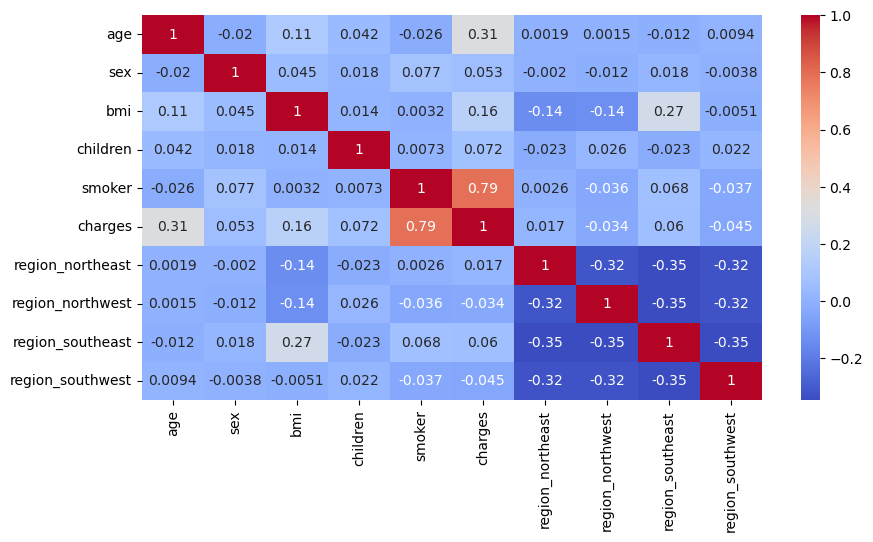

In [98]:
cr['charges']

plt.figure(figsize=(10,5))
sns.heatmap(cr,annot=True,cmap="coolwarm");

In [100]:
#Splitting the data into training and test

data_X = features.drop(columns='charges')
data_Y = features['charges']


In [101]:
data_X

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,0,27.900,0,1,0,0,0,1
1,18.0,1,33.770,1,0,0,0,1,0
2,28.0,1,33.000,3,0,0,0,1,0
3,33.0,1,22.705,0,0,0,1,0,0
4,32.0,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,0,1,0,0
1334,18.0,0,31.920,0,0,1,0,0,0
1335,18.0,0,36.850,0,0,0,0,1,0
1336,21.0,0,25.800,0,0,0,0,0,1


In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.3, random_state=90)


In [103]:
X_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
589,38.0,0,30.690,1,0,0,0,1,0
261,20.0,0,26.840,1,1,0,0,1,0
744,50.0,1,26.410,0,0,0,1,0,0
1293,46.0,1,25.745,3,0,0,1,0,0
1294,58.0,1,25.175,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
570,31.0,0,29.100,0,0,0,0,0,1
452,24.0,1,23.400,0,0,0,0,0,1
680,21.0,0,17.400,1,0,0,0,0,1
672,36.0,1,29.700,0,0,0,0,1,0


In [104]:


lr = LinearRegression()

# Train the model using the training sets

lr.fit(X_train,Y_train)

LinearRegression()

In [105]:
lr.intercept_

-7094.694552370882

In [106]:
lr.coef_

array([  231.56941249,  -266.74473386,   200.12933727,   372.93393096,
       19785.14355637,   499.79788269,   206.67068565,  -363.01924666,
        -343.44932167])

In [ ]:
Y_train

In [107]:
X_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
589,38.0,0,30.690,1,0,0,0,1,0
261,20.0,0,26.840,1,1,0,0,1,0
744,50.0,1,26.410,0,0,0,1,0,0
1293,46.0,1,25.745,3,0,0,1,0,0
1294,58.0,1,25.175,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
570,31.0,0,29.100,0,0,0,0,0,1
452,24.0,1,23.400,0,0,0,0,0,1
680,21.0,0,17.400,1,0,0,0,0,1
672,36.0,1,29.700,0,0,0,0,1,0


In [108]:
import statsmodels.api as sm
from scipy import stats

X_train_con1 = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train_con1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     331.3
Date:                Tue, 23 Jan 2024   Prob (F-statistic):          1.29e-265
Time:                        03:51:17   Log-Likelihood:                -9297.9
No. Observations:                 935   AIC:                         1.861e+04
Df Residuals:                     926   BIC:                         1.866e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5675.7556    793.145  

In [109]:
X_train.drop(columns='sex',inplace=True)

In [ ]:
# X_train.drop(columns='const', inplace=True)

In [110]:
lr1 =LinearRegression()
lr1.fit(X_train,Y_train)

LinearRegression()

In [111]:
X_test

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
1247,33.0,1,29.400,4,0,0,0,0,1
810,46.0,0,30.800,3,0,0,0,0,1
164,37.0,1,29.640,0,0,0,1,0,0
405,52.0,0,38.380,2,0,1,0,0,0
638,39.0,1,26.410,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
154,40.0,0,25.460,1,0,1,0,0,0
1229,58.0,1,30.305,0,0,1,0,0,0
1136,44.0,0,25.000,1,0,0,0,0,1
518,35.0,0,31.000,1,0,0,0,0,1


In [ ]:
X_train

In [ ]:
lr1.coef_

In [113]:
X_test = X_test[X_train.columns]

In [114]:
X_test

,age,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
1247,33.0,29.400,4,0,0,0,0,1
810,46.0,30.800,3,0,0,0,0,1
164,37.0,29.640,0,0,0,1,0,0
405,52.0,38.380,2,0,1,0,0,0
638,39.0,26.410,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...
154,40.0,25.460,1,0,1,0,0,0
1229,58.0,30.305,0,0,1,0,0,0
1136,44.0,25.000,1,0,0,0,0,1
518,35.0,31.000,1,0,0,0,0,1


In [115]:
Y_test

1247     6059.17300
810      9414.92000
164      5028.14660
405     11396.90020
638     20149.32290
           ...     
154      7077.18940
1229    11938.25595
1136     7623.51800
518      5240.76500
318      7421.19455
Name: charges, Length: 402, dtype: float64

In [116]:
lr1.score(X_test,  Y_test)

0.7580327773623897

In [ ]:
lr1.predict[]

In [117]:
Y_test

1247     6059.17300
810      9414.92000
164      5028.14660
405     11396.90020
638     20149.32290
           ...     
154      7077.18940
1229    11938.25595
1136     7623.51800
518      5240.76500
318      7421.19455
Name: charges, Length: 402, dtype: float64

In [122]:
features['charges'].describe()

count     1337.000000
mean     12491.159952
std      10165.511950
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      34524.777625
Name: charges, dtype: float64

In [123]:
np.percentile(features['charges'] , [2.5, 97.5])

array([ 1631.72946 , 34524.777625])

<Axes: xlabel='charges', ylabel='Count'>

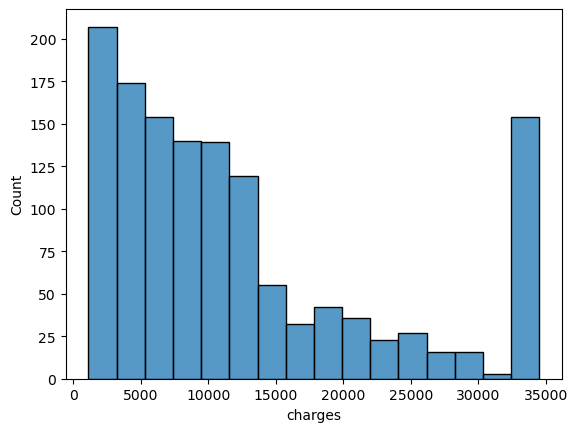

In [121]:
sns.histplot(features['charges'])

In [126]:
X_test.loc[1247]

age                 33.0
bmi                 29.4
children             4.0
smoker               0.0
region_northeast     0.0
region_northwest     0.0
region_southeast     0.0
region_southwest     1.0
Name: 1247, dtype: float64

In [129]:
lr1.predict([[33, 29, 4, 0 , 0, 0, 0 , 1]])

array([7362.55966146])

In [ ]:
lr1.predict(X_test)

In [118]:
y_pre = lr1.predict(X_test)

In [119]:
pd.DataFrame({'y_test':Y_test, 'y_pre':y_pre, 'error':abs(Y_test-y_pre)})

,y_test,y_pre,error
1247,6059.17300,7442.279623,1383.106623
810,9414.92000,10363.417476,948.497476
164,5028.14660,7480.663989,2452.517389
405,11396.90020,13737.714634,2340.814434
638,20149.32290,27356.057655,7206.734755
...,...,...,...
154,7077.18940,8011.110610,933.921210
1229,11938.25595,12777.590082,839.334132
1136,7623.51800,8002.694679,379.176679
518,5240.76500,7112.737882,1871.972882


In [120]:
X_train_constant = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     378.7
Date:                Tue, 23 Jan 2024   Prob (F-statistic):          8.81e-267
Time:                        03:57:27   Log-Likelihood:                -9298.2
No. Observations:                 935   AIC:                         1.861e+04
Df Residuals:                     927   BIC:                         1.865e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5764.4105    785.241  

<Axes: xlabel='charges'>

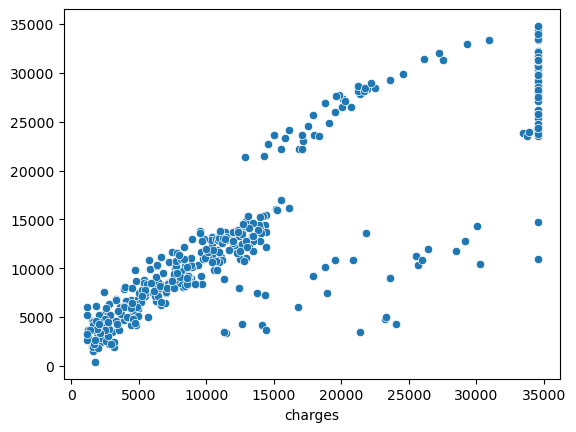

In [132]:
sns.scatterplot(x = Y_test, y= y_pre)

In [131]:
# !pip install explainerdashboard

In [130]:
from explainerdashboard import RegressionExplainer , ExplainerDashboard

explainer = RegressionExplainer(lr1, X_train, Y_train)
ExplainerDashboard(explainer).run()

Generating self.shap_explainer = shap.LinearExplainer(modelX)...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://10.5.51.14:8050


ConnectionError: HTTPConnectionPool(host='0.0.0.0', port=8050): Max retries exceeded with url: /_alive_d6c6b8dd-3a00-4589-bb0d-7e9168622757 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000200A11C2450>: Failed to establish a new connection: [WinError 10049] The requested address is not valid in its context'))

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(x):
    vif = pd.DataFrame({
        'Features': x.columns,
        'VIF': [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    })
    vif['VIF'] = vif['VIF'].round(2)
    vif = vif.sort_values(by='VIF', ascending=False).reset_index(drop=True)
    return vif

In [ ]:
VIF(X_test)